In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load the data
monthly_data = pd.read_csv('monthly_data.csv',index_col='DateTime')

In [3]:
monthly_data

,"(mm) Actual ET (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31","(mm) Grass Ref ET (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31","(mm) Precipitation (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31","(mm) Soil Moisture (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31","(deg C) Max Temperature (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31","(deg C) Min Temperature (TerraClimate) at -98.7092E,29.7839N, 1958-01-01 to 2019-12-31",GWL(m)
DateTime,,,,,,,
1958-01-01,73.2,73.2,105,183.9,14.7,1.2,200.648070
1958-02-01,66.5,66.5,106,218.5,13.1,2.8,202.248189
1958-03-01,77.5,92.3,58,196.2,17.4,5.2,204.212952
1958-04-01,86.5,126.3,37,145.2,24.4,11.7,203.520853
1958-05-01,143.3,155.7,140,134.9,28.5,15.8,204.262900
...,...,...,...,...,...,...,...
2019-08-01,32.8,209.2,26,37.9,36.8,23.2,203.658904
2019-09-01,34.8,185.2,31,32.3,35.2,21.7,202.993752
2019-10-01,110.4,121.2,115,30.8,27.5,13.6,203.771779


In [4]:
# define independent and dependent parameters 
X = monthly_data.drop(columns=['GWL(m)'] , axis=1)
y = monthly_data['GWL(m)']

2 AI( Linear Regression and Decision Tree Regressor) models and their performances using 3-fold cross validation technique


In [5]:
# define the models
models = [('Random Forest Regression', RandomForestRegressor(n_estimators=100, random_state=1)), 
          ('Support Vector Regression', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))]

In [6]:
# evaluate the models using 3-fold cross-validation
for name, model in models:
    scores = cross_validate(model, X, y, cv=3, scoring=['r2', 'neg_root_mean_squared_error'])
    r2_mean = np.mean(scores['test_r2'])
    rmse_mean = -np.mean(scores['test_neg_root_mean_squared_error'])
    # Report the results
    print('Model:', model.__class__.__name__)
    print('R2 scores:', r2_mean)
    print('Mean R2 score:', r2_mean.mean())
    print('RMSE scores:', rmse_mean)
    print('Mean RMSE score:', rmse_mean.mean())
    print()
    

Model: RandomForestRegressor
R2 scores: 0.352679537496784
Mean R2 score: 0.352679537496784
RMSE scores: 3.7758491835999144
Mean RMSE score: 3.7758491835999144

Model: SVR
R2 scores: 0.016706322826321007
Mean R2 score: 0.016706322826321007
RMSE scores: 4.642837283777339
Mean RMSE score: 4.642837283777339



Artificial Nueral Network (ANN) model

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [10]:
# create ANN model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(3,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 12)                312       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
 dense_6 (Dense)             (None, 1)                 4

In [12]:
model.compile(optimizer='adam',loss='poisson')

In [13]:
history=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
19/19 [==============================] - 2s 22ms/step - loss: 140.0816 - val_loss: 137.2687
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 134.5363 - val_loss: 130.2373
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 123.4252 - val_loss: 109.6656
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 82.4308 - val_loss: 40.5576
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 18.1944 - val_loss: 4.5383
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 2.8130 - val_loss: 1.7418
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 1.5638 - val_loss: 1.3891
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 1.3442 - val_loss: 1.2665
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 1.2449 - val_loss: 1.2017
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 1.1867 - val_loss: 

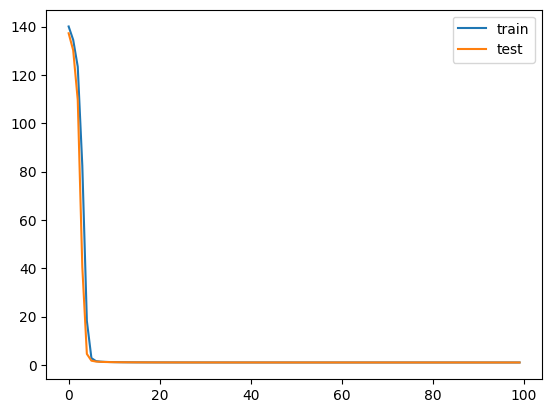

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()